In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline 

In [2]:
df=pd.read_csv('pizza_v2.csv')
df

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes
...,...,...,...,...,...,...,...,...,...
124,E,"Rp39,000",8.5 inch,tuna,spicy tuna,small,yes,yes,yes
125,E,"Rp72,000",12 inch,tuna,spicy tuna,medium,yes,yes,yes
126,E,"Rp99,000",14 inch,tuna,spicy tuna,large,yes,yes,yes
127,E,"Rp44,000",8.5 inch,meat,BBQ_meat_fiesta,small,yes,no,yes


In [3]:
df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [4]:
df.tail()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
124,E,"Rp39,000",8.5 inch,tuna,spicy tuna,small,yes,yes,yes
125,E,"Rp72,000",12 inch,tuna,spicy tuna,medium,yes,yes,yes
126,E,"Rp99,000",14 inch,tuna,spicy tuna,large,yes,yes,yes
127,E,"Rp44,000",8.5 inch,meat,BBQ_meat_fiesta,small,yes,no,yes
128,E,"Rp78,000",12 inch,meat,BBQ_meat_fiesta,medium,no,no,yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          129 non-null    object
 1   price_rupiah     129 non-null    object
 2   diameter         129 non-null    object
 3   topping          129 non-null    object
 4   variant          129 non-null    object
 5   size             129 non-null    object
 6   extra_sauce      129 non-null    object
 7   extra_cheese     129 non-null    object
 8   extra_mushrooms  129 non-null    object
dtypes: object(9)
memory usage: 9.2+ KB


In [6]:
df.rename({'price_rupiah':'price'},axis=1,inplace=True)

In [7]:
df['price']=df.price.str.replace('Rp','').str.replace(',','').astype(int)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          129 non-null    object
 1   price            129 non-null    int32 
 2   diameter         129 non-null    object
 3   topping          129 non-null    object
 4   variant          129 non-null    object
 5   size             129 non-null    object
 6   extra_sauce      129 non-null    object
 7   extra_cheese     129 non-null    object
 8   extra_mushrooms  129 non-null    object
dtypes: int32(1), object(8)
memory usage: 8.7+ KB


In [9]:
df['diameter']=df['diameter'].str.replace('inch','').astype(float)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   company          129 non-null    object 
 1   price            129 non-null    int32  
 2   diameter         129 non-null    float64
 3   topping          129 non-null    object 
 4   variant          129 non-null    object 
 5   size             129 non-null    object 
 6   extra_sauce      129 non-null    object 
 7   extra_cheese     129 non-null    object 
 8   extra_mushrooms  129 non-null    object 
dtypes: float64(1), int32(1), object(7)
memory usage: 8.7+ KB


In [11]:
df.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,235000,22.0,chicken,double_signature,jumbo,yes,yes,no
1,A,198000,20.0,papperoni,double_signature,jumbo,yes,yes,no
2,A,120000,16.0,mushrooms,double_signature,reguler,yes,yes,yes
3,A,155000,14.0,smoked_beef,double_signature,reguler,yes,no,yes
4,A,248000,18.0,mozzarella,double_signature,jumbo,yes,no,yes


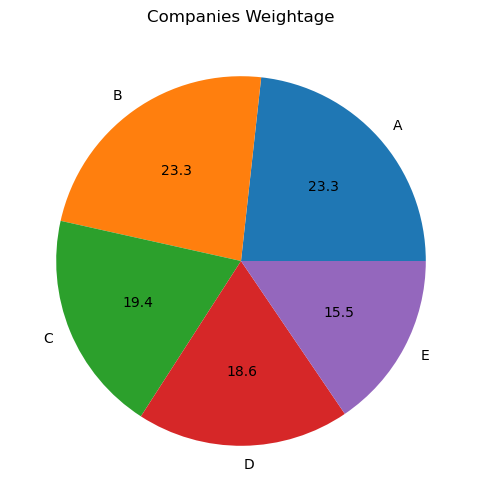

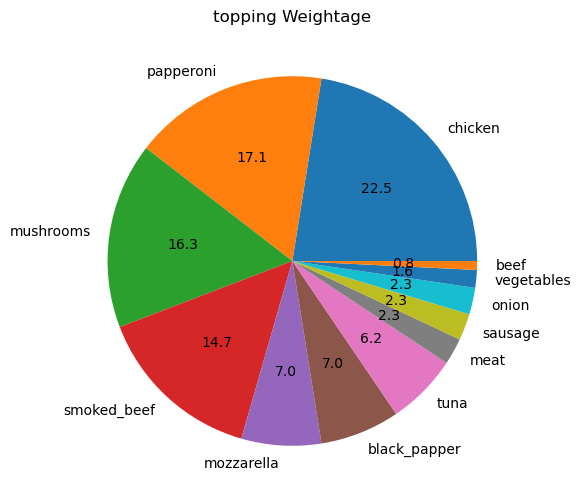

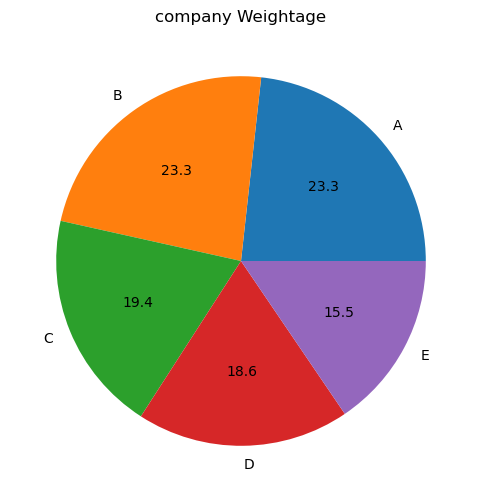

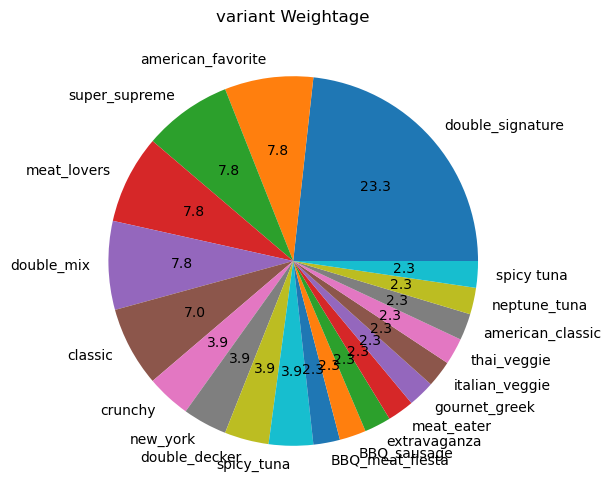

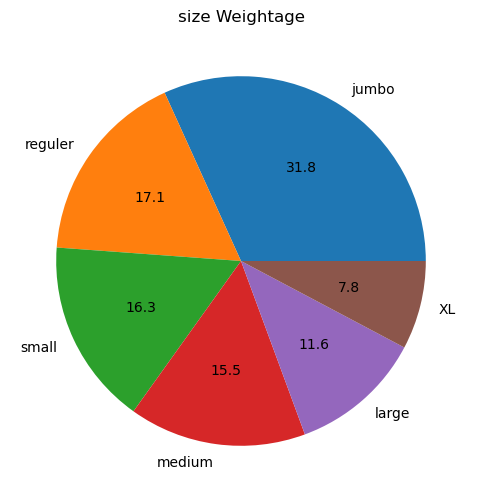

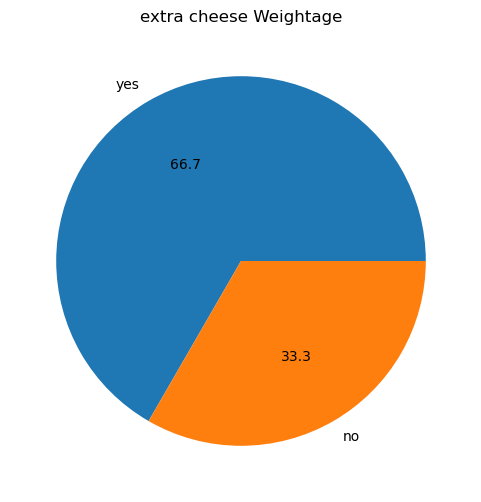

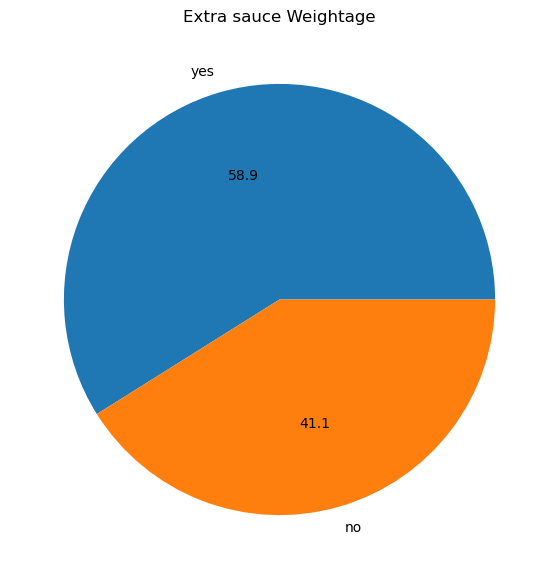

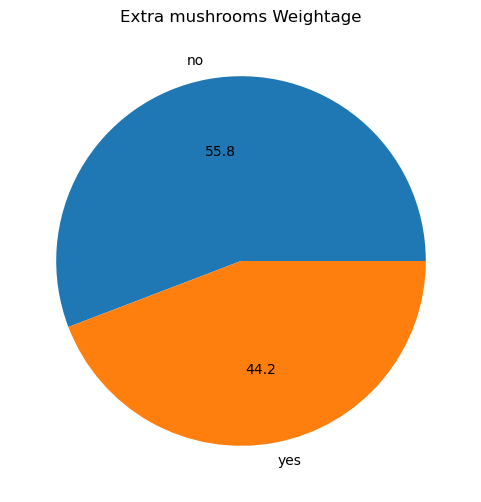

In [12]:
### Data Visualization

plt.figure(figsize=(6,6))
plt.pie(df['company'].value_counts(),labels=df['company'].unique(),autopct='%1.1f')
plt.title('Companies Weightage')
plt.show()

plt.figure(figsize=(6,6))
plt.pie(df['topping'].value_counts(),labels=df['topping'].unique(),autopct='%1.1f')
plt.title('topping Weightage')
plt.show()

plt.figure(figsize=(6,6))
plt.pie(df['company'].value_counts(),labels=df['company'].unique(),autopct='%1.1f')
plt.title('company Weightage')
plt.show()

plt.figure(figsize=(6,6))
plt.pie(df['variant'].value_counts(),labels=df['variant'].unique(),autopct='%1.1f')
plt.title('variant Weightage')
plt.show()

plt.figure(figsize=(6,6))
plt.pie(df['size'].value_counts(),labels=df['size'].unique(),autopct='%1.1f')
plt.title('size Weightage')
plt.show()

plt.figure(figsize=(6,6))
plt.pie(df['extra_cheese'].value_counts(),labels=df['extra_cheese'].unique(),autopct='%1.1f')
plt.title('extra cheese Weightage')
plt.show()

plt.figure(figsize=(7,7))
plt.pie(df['extra_sauce'].value_counts(),labels=df['extra_sauce'].unique(),autopct='%1.1f')
plt.title('Extra sauce Weightage')
plt.show()

plt.figure(figsize=(6,6))
plt.pie(df['extra_mushrooms'].value_counts(),labels=df['extra_mushrooms'].unique(),autopct='%1.1f')
plt.title('Extra mushrooms Weightage')
plt.show()

<Axes: xlabel='company', ylabel='Count'>

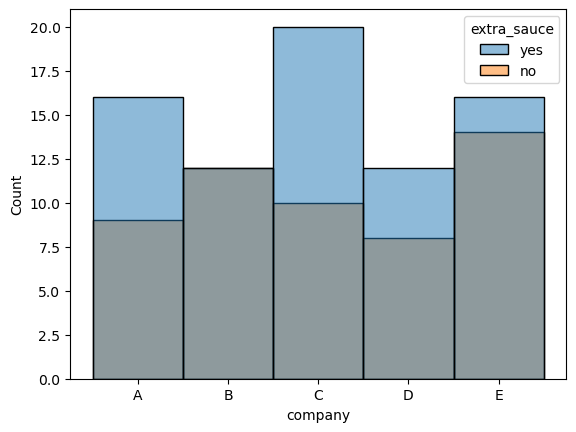

In [13]:
sns.histplot(data=df,x='company',hue='extra_sauce')

<Axes: xlabel='count', ylabel='Density'>

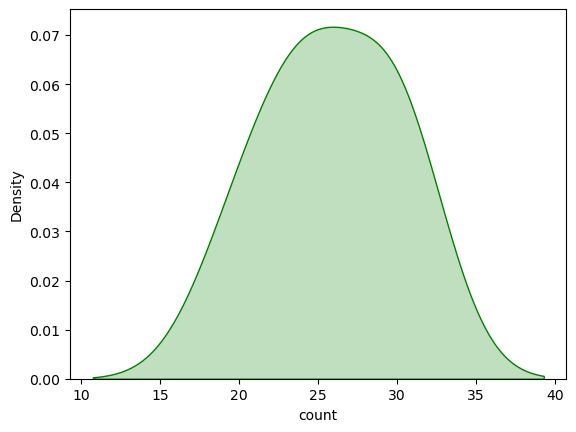

In [14]:
df_company=df.groupby('company').agg({'company':['count']})
sns.kdeplot(df['company'].value_counts(),color='g',fill=True)


<Axes: xlabel='count', ylabel='Density'>

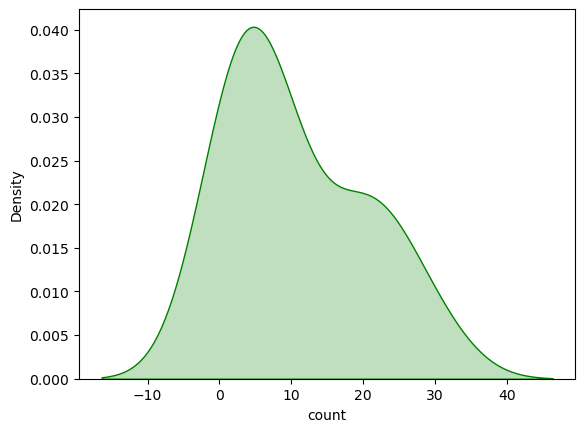

In [15]:
df_toppings=df.groupby('topping').agg({'topping':['count']})
sns.kdeplot(df['topping'].value_counts(),color='g',fill=True)

<Axes: xlabel='company', ylabel='Count'>

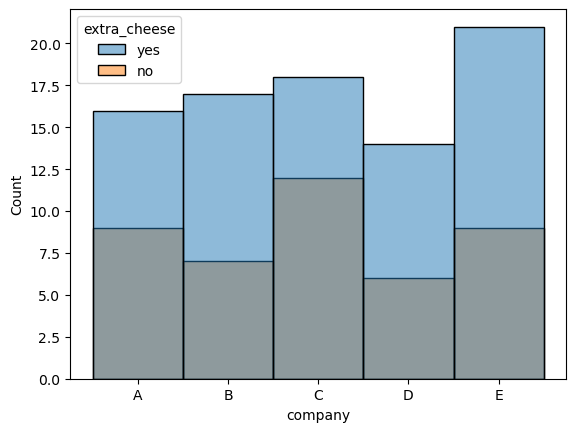

In [16]:
## Histogram for extra cheese.

sns.histplot(data=df,x='company',hue='extra_cheese')


<Axes: xlabel='price', ylabel='Count'>

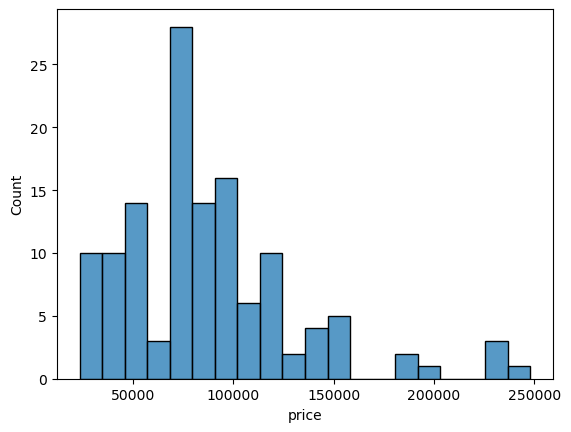

In [17]:
sns.histplot(data=df,x='price',bins=20)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, '8.0'),
  Text(1, 0, '8.5'),
  Text(2, 0, '12.0'),
  Text(3, 0, '14.0'),
  Text(4, 0, '16.0'),
  Text(5, 0, '16.5'),
  Text(6, 0, '17.0'),
  Text(7, 0, '18.0'),
  Text(8, 0, '18.5'),
  Text(9, 0, '20.0'),
  Text(10, 0, '22.0')])

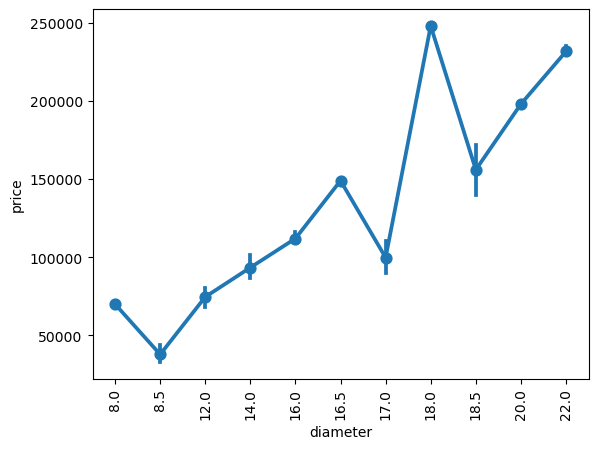

In [18]:
sns.pointplot(data=df.sort_values(by='diameter'),x='diameter',y='price')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'double_signature'),
  Text(1, 0, 'american_favorite'),
  Text(2, 0, 'super_supreme'),
  Text(3, 0, 'meat_lovers'),
  Text(4, 0, 'double_mix'),
  Text(5, 0, 'classic'),
  Text(6, 0, 'crunchy'),
  Text(7, 0, 'new_york'),
  Text(8, 0, 'double_decker'),
  Text(9, 0, 'spicy_tuna'),
  Text(10, 0, 'BBQ_meat_fiesta'),
  Text(11, 0, 'BBQ_sausage'),
  Text(12, 0, 'extravaganza'),
  Text(13, 0, 'meat_eater'),
  Text(14, 0, 'gournet_greek'),
  Text(15, 0, 'italian_veggie'),
  Text(16, 0, 'thai_veggie'),
  Text(17, 0, 'american_classic'),
  Text(18, 0, 'neptune_tuna'),
  Text(19, 0, 'spicy tuna')])

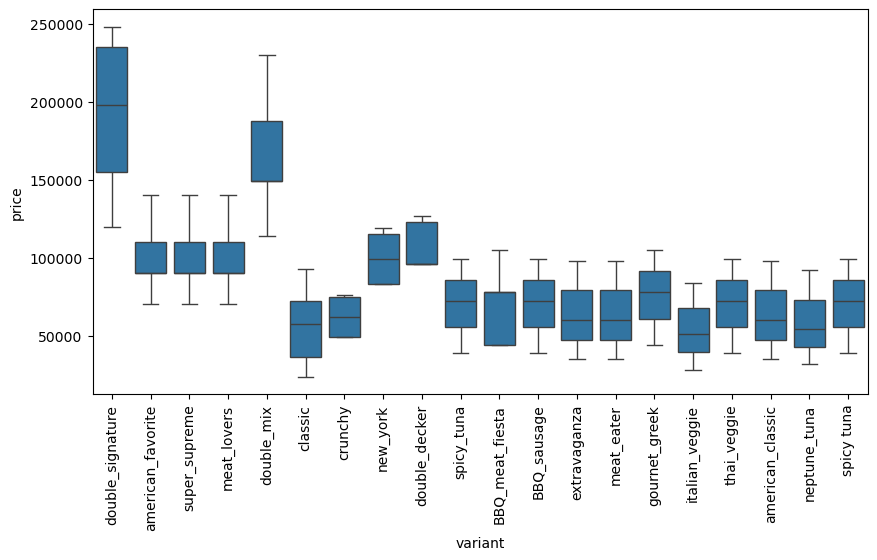

In [19]:
# BoxPlot for variants.
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='variant',y='price')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'double_signature'),
  Text(1, 0, 'american_favorite'),
  Text(2, 0, 'super_supreme'),
  Text(3, 0, 'meat_lovers'),
  Text(4, 0, 'double_mix'),
  Text(5, 0, 'classic'),
  Text(6, 0, 'crunchy'),
  Text(7, 0, 'new_york'),
  Text(8, 0, 'double_decker'),
  Text(9, 0, 'spicy_tuna'),
  Text(10, 0, 'BBQ_meat_fiesta'),
  Text(11, 0, 'BBQ_sausage'),
  Text(12, 0, 'extravaganza'),
  Text(13, 0, 'meat_eater'),
  Text(14, 0, 'gournet_greek'),
  Text(15, 0, 'italian_veggie'),
  Text(16, 0, 'thai_veggie'),
  Text(17, 0, 'american_classic'),
  Text(18, 0, 'neptune_tuna'),
  Text(19, 0, 'spicy tuna')])

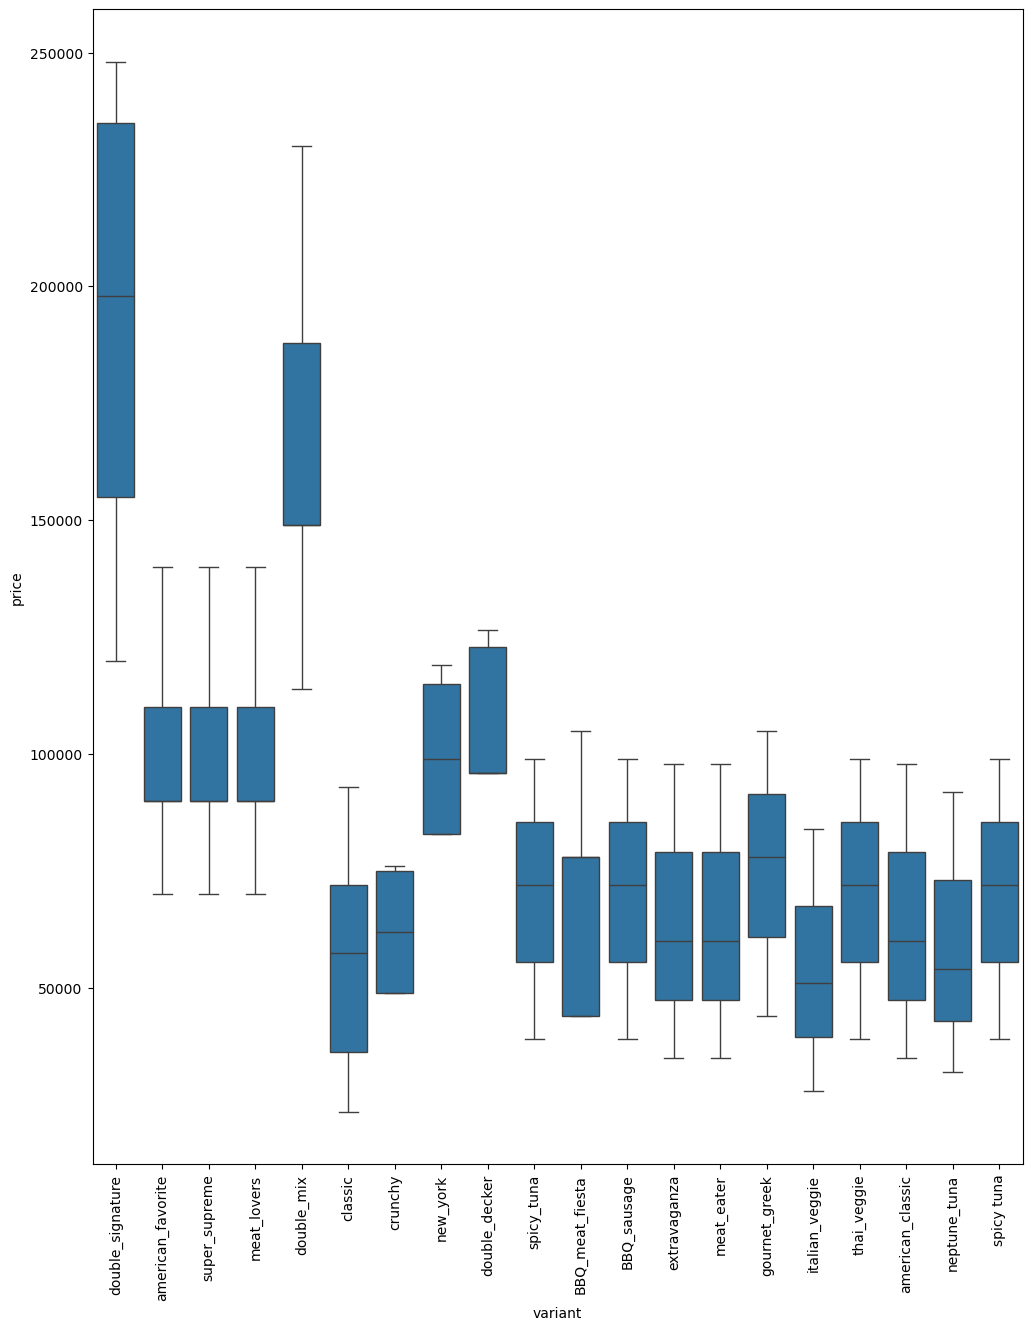

In [20]:
plt.figure(figsize=(12,15))
sns.boxplot(data=df,x='variant',y='price')
plt.xticks(rotation=90)

## Feature Engineering

In [22]:
df.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,235000,22.0,chicken,double_signature,jumbo,yes,yes,no
1,A,198000,20.0,papperoni,double_signature,jumbo,yes,yes,no
2,A,120000,16.0,mushrooms,double_signature,reguler,yes,yes,yes
3,A,155000,14.0,smoked_beef,double_signature,reguler,yes,no,yes
4,A,248000,18.0,mozzarella,double_signature,jumbo,yes,no,yes


In [23]:
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce

def one_hot_encoding(df,col):
    one_hot_encoder=ce.OneHotEncoder(cols=col,return_df=True,use_cat_names=True)
    df_final=one_hot_encoder.fit_transform(df)
    return df_final

def one_hot(df,column):
    df=one_hot_encoding(df,column)
    return df



In [24]:
#!pip install --upgrade category_encoders

In [25]:
df=one_hot(df,'company')
df=one_hot(df,'topping')
df=one_hot(df,'variant')
df=one_hot(df,'size')
df=one_hot(df,'extra_sauce')
df=one_hot(df,'extra_cheese')
df=one_hot(df,'extra_mushrooms')

In [26]:
df.head()

,company_A,company_B,company_C,company_D,company_E,price,diameter,topping_chicken,topping_papperoni,topping_mushrooms,...,size_small,size_medium,size_large,size_XL,extra_sauce_yes,extra_sauce_no,extra_cheese_yes,extra_cheese_no,extra_mushrooms_no,extra_mushrooms_yes
0,1,0,0,0,0,235000,22.0,1,0,0,...,0,0,0,0,1,0,1,0,1,0
1,1,0,0,0,0,198000,20.0,0,1,0,...,0,0,0,0,1,0,1,0,1,0
2,1,0,0,0,0,120000,16.0,0,0,1,...,0,0,0,0,1,0,1,0,0,1
3,1,0,0,0,0,155000,14.0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
4,1,0,0,0,0,248000,18.0,0,0,0,...,0,0,0,0,1,0,0,1,0,1


In [27]:
df.dtypes

company_A                      int64
company_B                      int64
company_C                      int64
company_D                      int64
company_E                      int64
price                          int32
diameter                     float64
topping_chicken                int64
topping_papperoni              int64
topping_mushrooms              int64
topping_smoked_beef            int64
topping_mozzarella             int64
topping_black_papper           int64
topping_tuna                   int64
topping_meat                   int64
topping_sausage                int64
topping_onion                  int64
topping_vegetables             int64
topping_beef                   int64
variant_double_signature       int64
variant_american_favorite      int64
variant_super_supreme          int64
variant_meat_lovers            int64
variant_double_mix             int64
variant_classic                int64
variant_crunchy                int64
variant_new_york               int64
v

In [28]:
X=df.drop('price',axis=1)
y=df['price']

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [30]:
X_train.shape

(103, 50)

In [31]:
X_test.shape

(26, 50)

### Model building with ML models
1. XGB regressor
2. Support vector regressor

## XGB Regressor

- Using GridsearchCV for best parameters

In [34]:
from xgboost import XGBRegressor

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
param_grid={'n_estimators':[2000,4000,6000],
'max_depth':[3,4,5,6],
'learning_rate':[0.01,0.1,0.2,0.3,0.5]
}

In [37]:
model=GridSearchCV(XGBRegressor(random_state=42),param_grid=param_grid,scoring='r2')

                   

In [38]:
X_train.head()

,company_A,company_B,company_C,company_D,company_E,diameter,topping_chicken,topping_papperoni,topping_mushrooms,topping_smoked_beef,...,size_small,size_medium,size_large,size_XL,extra_sauce_yes,extra_sauce_no,extra_cheese_yes,extra_cheese_no,extra_mushrooms_no,extra_mushrooms_yes
19,1,0,0,0,0,12.0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
14,1,0,0,0,0,12.0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
91,0,0,0,1,0,14.0,0,0,0,1,...,0,0,1,0,1,0,0,1,0,1
35,0,1,0,0,0,17.0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,1
20,1,0,0,0,0,22.0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,1


In [39]:
#pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [60]:
# model.fit(X_train,y_train)

In [44]:
### Using SVR predicting the Scores.

from sklearn.svm import SVR

In [46]:
model1=SVR()

In [48]:
model1.fit(X_train,y_train)

SVR()

In [50]:
pred1=model1.predict(X_test)

In [62]:
from sklearn.metrics import *

mae=metrics.mean_absolute_error(pred1,y_test)
print('Mean absolute error: ',mae)

mse=metrics.mean_squared_error(pred1,y_test)
print('Mean squared error: ',mse)

score=metrics.r2_score(pred1,y_test)
print('R2 Score: ',score)

<IPython.core.display.Javascript object>

Mean absolute error:  32802.31970075573


<IPython.core.display.Javascript object>

Mean squared error:  2135928580.556384


<IPython.core.display.Javascript object>

R2 Score:  -56763383.84353451


### Linear Regression

In [65]:
from sklearn.linear_model import LinearRegression

In [67]:
lr=LinearRegression()
lr.fit(X_train,y_train)
lr_pred=lr.predict(X_test)

In [69]:
mae=metrics.mean_absolute_error(lr_pred,y_test)
print('Mean absolute error: ',mae)

mse=metrics.mean_squared_error(lr_pred,y_test)
print('Mean squared error: ',mse)

score=metrics.r2_score(lr_pred,y_test)
print('R2 Score: ',score)

<IPython.core.display.Javascript object>

Mean absolute error:  16795.20700767886


<IPython.core.display.Javascript object>

Mean squared error:  529118785.01379704


<IPython.core.display.Javascript object>

R2 Score:  0.7964554970881174


### Eval ML

- Autommated machine learning



In [82]:
#!pip install evalml

In [80]:
#import evalml

- Repeat the same process as above to get the results.

******* Practice file ***************